In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


In [4]:
import os

In [5]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [6]:
import pandas as pd

In [7]:
survey_name = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
survey_raw = pd.read_csv(survey_name, index_col='Column').QuestionText
survey_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [8]:
survey_result_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')
survey_result_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [9]:
survey_result_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [10]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [11]:
len(selected_columns)

20

In [12]:
survey_df = survey_result_df[selected_columns].copy()
schema = survey_raw[selected_columns]

In [13]:
survey_df.shape

(64461, 20)

In [14]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [15]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [16]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [17]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [18]:
survey_df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [19]:
"survey_df = survey_df[survey_df['Gender'].isin(['Man', 'Woman', 'Non-binary, genderqueer, or gender non-conforming'])]"
import numpy as np
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [20]:
survey_df.sample(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
62040,Colombia,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Once a year,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN
42972,United States,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS;JavaScript;PHP;SQL,NaN,Once a year,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
55579,Russian Federation,51.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,21.0,30.0,27.0,C;C#;C++;HTML/CSS;Java;JavaScript;Perl;Python,C;C#;C++;Go;Haskell;HTML/CSS;Java;JavaScript;O...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Academic researcher;Designer;Developer, back-e...",70.0,Very satisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Very important
26170,Germany,46.0,Woman,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,No,11.0,25.0,20.0,HTML/CSS;JavaScript;PHP;SQL,HTML/CSS;JavaScript;PHP;Ruby;SQL;TypeScript,Every few months,Go for a walk or other physical activity;Do ot...,"Independent contractor, freelancer, or self-em...","Developer, front-end",60.0,Neither satisfied nor dissatisfied,Diversity of the company or organization;Remot...,Often: 1-2 days per week or more,Not at all important/not necessary
24810,Brazil,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,17.0,7.0,5.0,Dart;HTML/CSS;JavaScript;Ruby,Dart,Once every few years,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, full-stack;Developer, mobile",40.0,Slightly satisfied,Flex time or a flexible schedule;Specific depa...,Never,Fairly important


In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [23]:
schema.Country

'Where do you live?'

In [24]:
survey_df.Country.nunique()

183

In [25]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

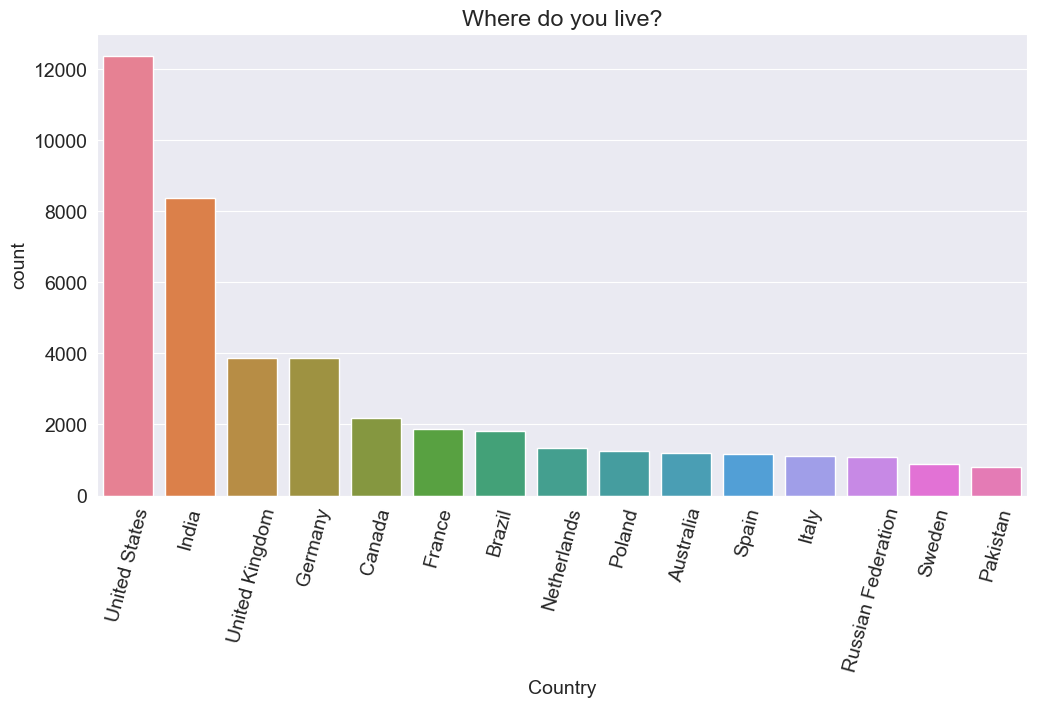

In [26]:
"""
custom_palette = sns.color_palette("husl", len(top_countries))
sns.barplot(x=top_countries.index, y=top_countries, palette=custom_palette)
"""
plt.figure(figsize=(12,6))
sns.set_color_codes("muted")
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries, hue=top_countries.index, palette='husl', legend=False);

In [27]:
od.download('countries-languages-spoken')

Using downloaded and verified file: .\countries-languages-spoken\countries-languages.csv


In [28]:
os.listdir('countries-languages-spoken')

['countries-languages.csv']

In [29]:
languages = pd.read_csv('countries-languages-spoken/countries-languages.csv')
languages

,Country,Languages Spoken
0,Afghanistan,"Dari Persian, Pashtu (both official), other Tu..."
1,Albania,"Albanian (Tosk is the official dialect), Greek"
2,Algeria,"Arabic (official), French, Berber dialects"
3,Andorra,"Catalán (official), French, Castilian, Portuguese"
4,Angola,"Portuguese (official), Bantu and other African..."
...,...,...
193,Vietnam,Vietnamese (official); English (increasingly f...
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic"
195,Yemen,Arabic
196,Zambia,"English (official); major vernaculars: Bemba, ..."


In [30]:
survey_lang = survey_df['Country'].copy()

In [31]:
# Merge the two dataframes based on the 'Country' column
merged_df = pd.merge(survey_lang, languages, on='Country', how='left')
# Check if 'English' is one of the languages for each country
merged_df['EnglishSpeaking'] = merged_df['Languages Spoken'].str.contains('English', case=False, na=False)

# Calculate the percentage of responses from English-speaking countries
english_speaking_percentage = (merged_df['EnglishSpeaking'].sum() / merged_df.shape[0]) * 100

# Calculate the percentage of responses from non-English speaking countries
non_english_speaking_percentage = 100 - english_speaking_percentage

# Print the results
print(f"Percentage of responses from English-speaking countries: {english_speaking_percentage:.2f}%")
print(f"Percentage of responses from non-English speaking countries: {non_english_speaking_percentage:.2f}%")


Percentage of responses from English-speaking countries: 60.10%
Percentage of responses from non-English speaking countries: 39.90%


In [32]:
merged_df.shape[0]

64306

In [33]:
merged_df.sample(5)

,Country,Languages Spoken,EnglishSpeaking
40606,Turkey,"Turkish (official), Kurdish, Dimli, Azeri, Kab...",False
33245,United Kingdom,"English, Welsh, Scots Gaelic",True
44116,Switzerland,"German 64%, French 20%, Italian 7% (all offici...",False
29727,Poland,Polish 98% (2002),False
30941,Czech Republic,Czech,False


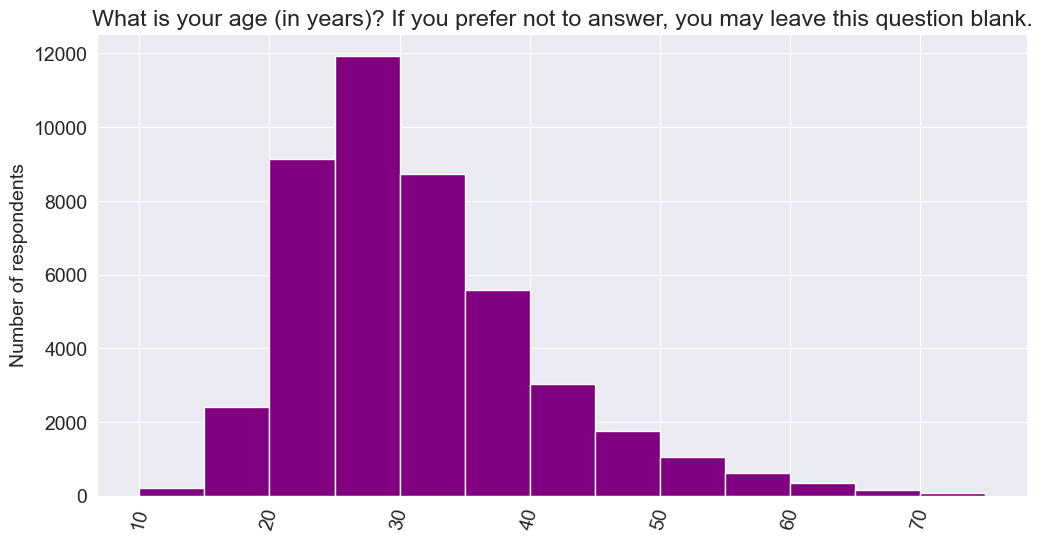

In [34]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Age)
plt.ylabel('Number of respondents')
plt.hist(x=survey_df.Age, bins=np.arange(10,80,5), color='purple');

In [35]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

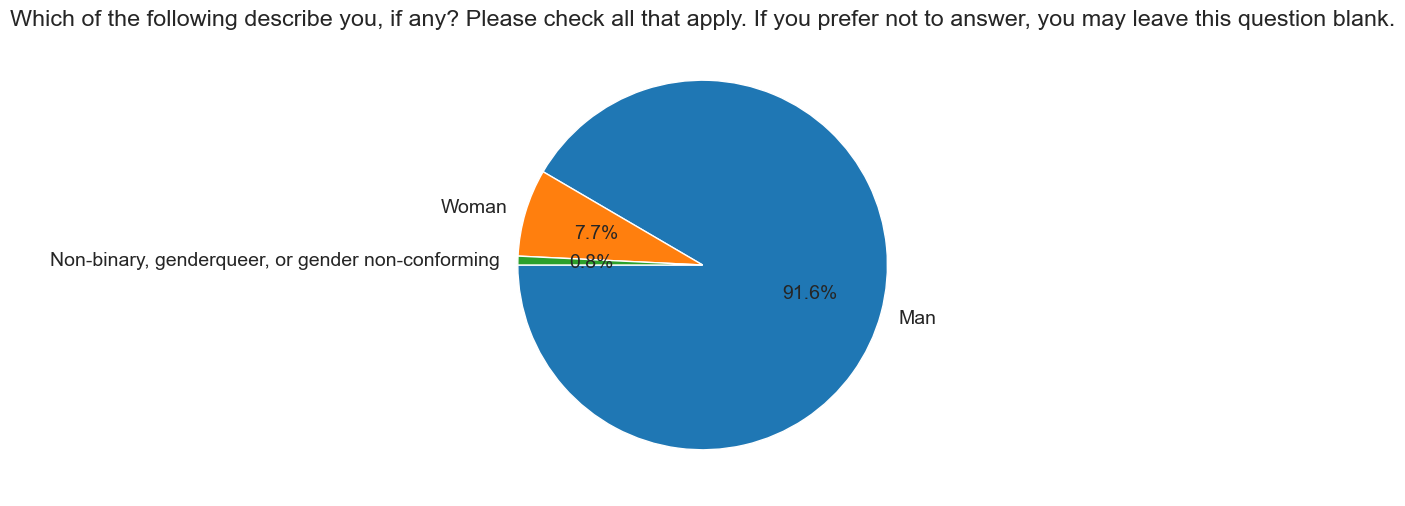

In [36]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

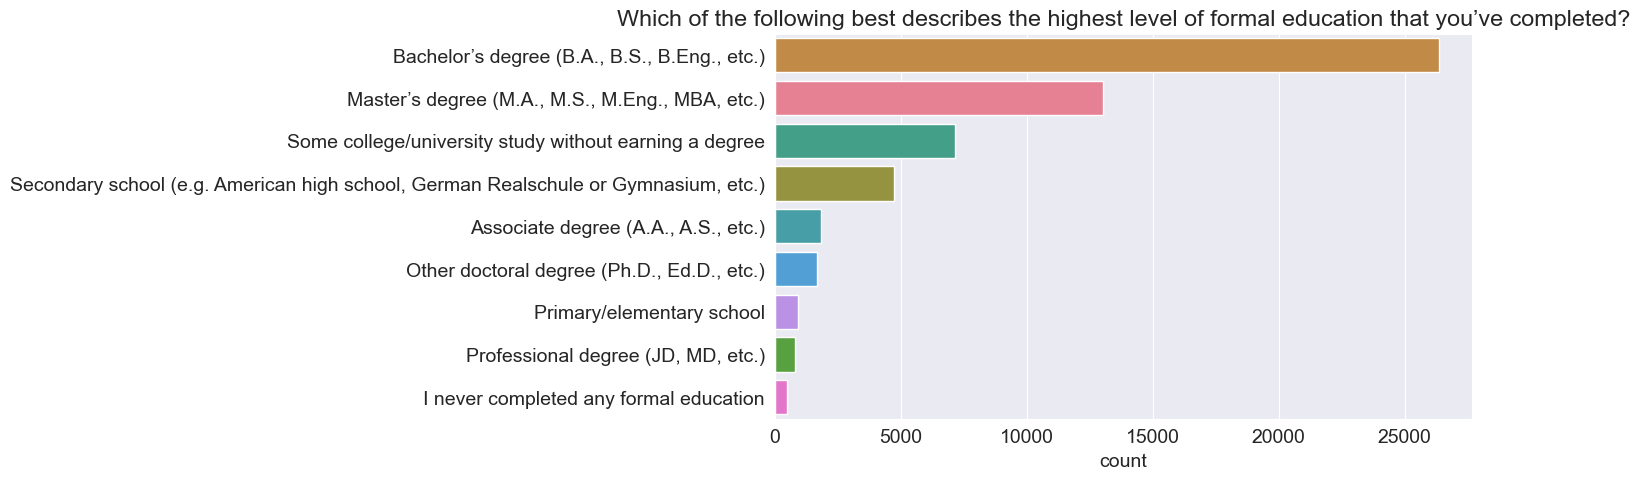

In [37]:
order = survey_df.EdLevel.value_counts().index
sns.countplot(y=survey_df.EdLevel, order=order, hue=survey_df.EdLevel, palette='husl', legend=False)
plt.title(schema.EdLevel)
plt.ylabel(None);

In [38]:
total_counts = survey_df.EdLevel.value_counts()
percentage_df = survey_df.groupby(['EdLevel', 'Gender']).size().unstack().div(total_counts, axis=0) * 100
percentage_df

Gender,Man,"Non-binary, genderqueer, or gender non-conforming",Woman
EdLevel,,,
"Associate degree (A.A., A.S., etc.)",81.048607,0.764610,5.516111
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",77.754591,0.527394,7.300046
I never completed any formal education,61.875000,1.666667,3.333333
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",78.086609,0.529791,7.248157
"Other doctoral degree (Ph.D., Ed.D., etc.)",77.156454,0.773349,8.863772
Primary/elementary school,82.238967,0.645856,2.260495
"Professional degree (JD, MD, etc.)",77.301387,0.378310,5.044136
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",82.557155,1.058425,4.445385
Some college/university study without earning a degree,82.018707,0.963284,4.579087


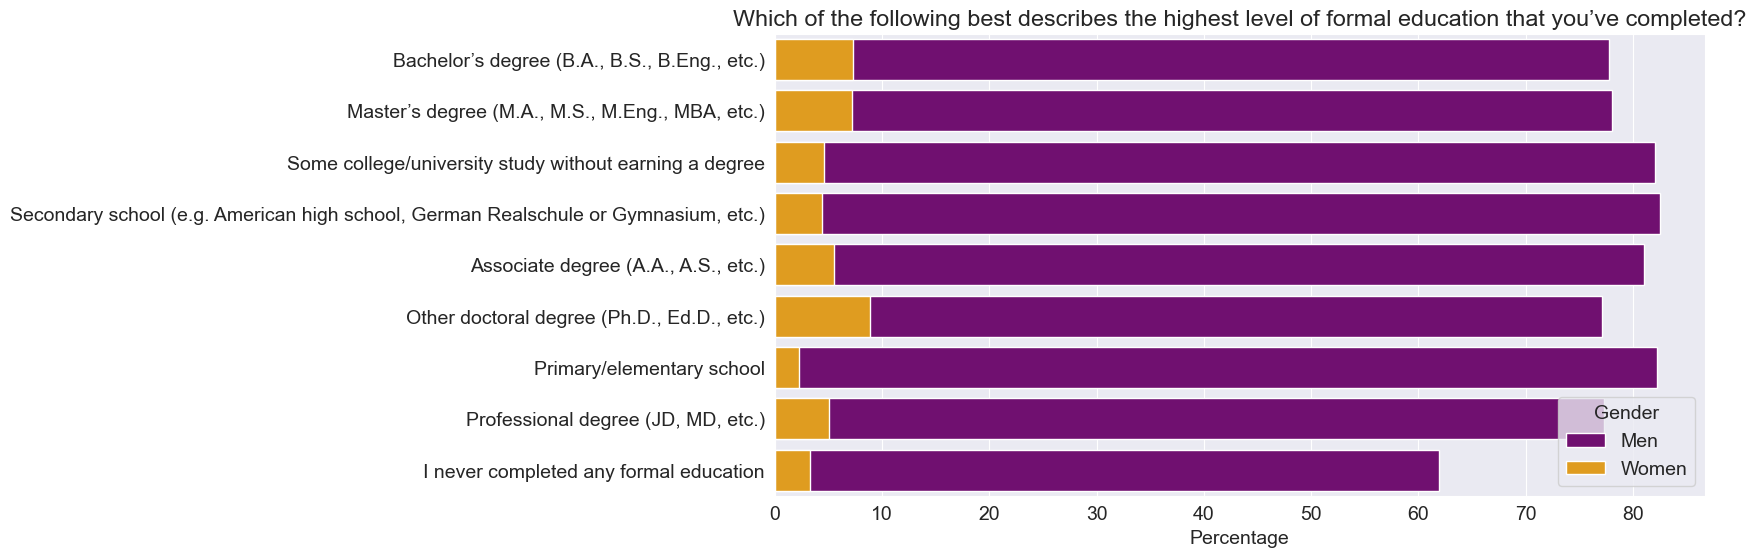

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(y=percentage_df.index, x=percentage_df.Man, order=order, color='purple', label='Men')
sns.barplot(y=percentage_df.index, x=percentage_df.Woman, order=order, color='orange', label='Women')
plt.title(schema.EdLevel)
plt.xlabel('Percentage')
plt.ylabel(None)
plt.legend(title='Gender')

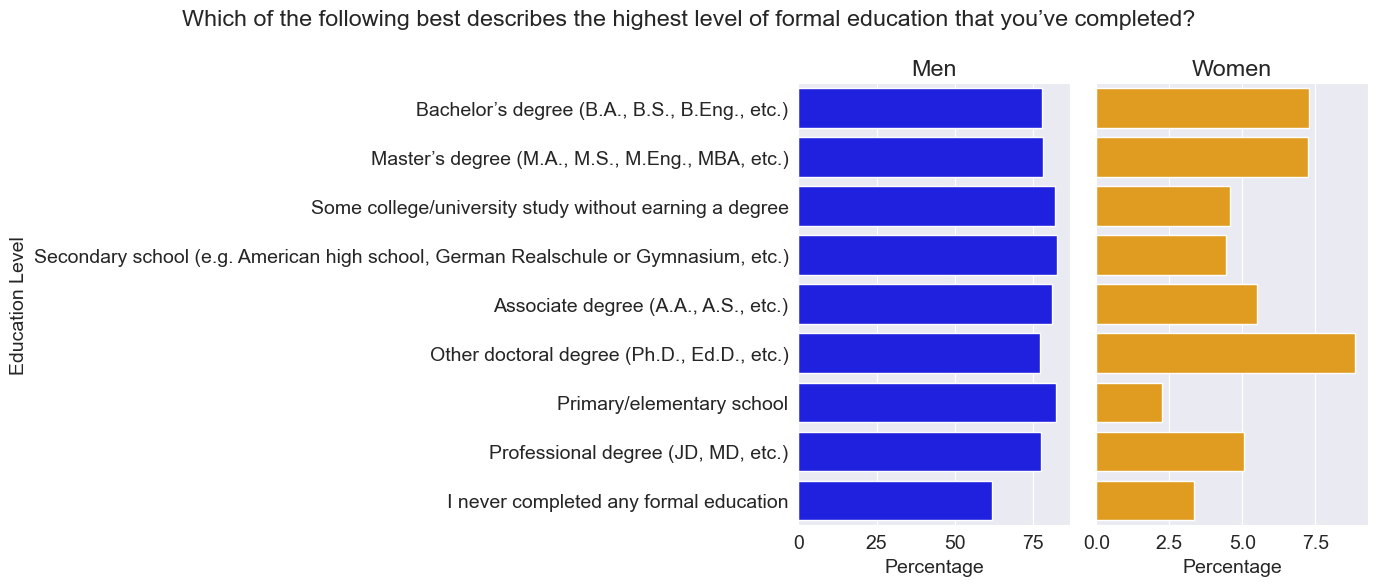

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for Men
sns.barplot(y=percentage_df.index, x=percentage_df['Man'], color='blue', order=order, ax=axes[0])
axes[0].set_title('Men')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Education Level')

# Plot for Women
sns.barplot(y=percentage_df.index, x=percentage_df['Woman'], color='orange', order=order, ax=axes[1])
axes[1].set_title('Women')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel(None)
axes[1].set_yticklabels([])

plt.subplots_adjust(wspace=0.8)
plt.suptitle(schema.EdLevel)
plt.tight_layout()
plt.show()

In [41]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()
undergrad_pct

UndergradMajor
Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                         

Text(0.5, 0, 'Percentage')

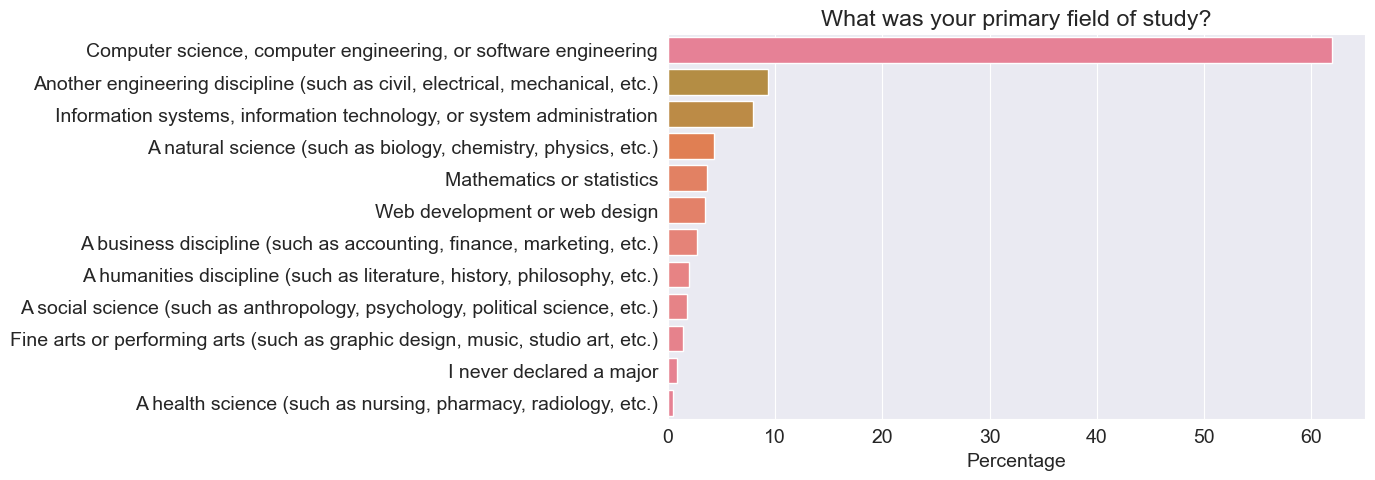

In [42]:
sns.barplot(x=undergrad_pct, y=undergrad_pct.index, hue=undergrad_pct, palette='husl', legend=False)
plt.title(schema.UndergradMajor)
plt.ylabel(None)
plt.xlabel('Percentage')

In [43]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

In [44]:
computer_degree_df = survey_df[survey_df['UndergradMajor'].str.contains('Computer', case=False, na=False)]
no_computer_degree_df = survey_df[~(survey_df['UndergradMajor'].str.contains('Computer', case=False, na=False))]
computer_degree_df.sample(4)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
42784,Greece,45.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,7.0,30.0,12.0,C;HTML/CSS;JavaScript;PHP;Python,HTML/CSS;JavaScript;Python,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Database administrator;Developer, back-end;Dev...",45.0,Very satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Critically important
11523,Slovakia,49.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,32.0,27.0,C++;HTML/CSS;Java;JavaScript;PHP;SQL;VBA,HTML/CSS;Java;JavaScript;PHP;SQL,Once every few years,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Database administrator;Designer;Developer, bac...",6.0,Very dissatisfied,Flex time or a flexible schedule;Opportunities...,Rarely: 1-2 days per year or less,Very important
8714,India,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,11.0,9.0,6.0,C;C++;Java;Kotlin;Objective-C,Dart;Swift,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack;Developer, mobile",65.0,Slightly satisfied,Flex time or a flexible schedule;Office enviro...,Sometimes: 1-2 days per month but less than we...,Very important
25927,Poland,21.0,"Non-binary, genderqueer, or gender non-conforming",Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,11.0,10.0,3.0,Bash/Shell/PowerShell;C#;C++;HTML/CSS;Java;Jav...,C#;C++;Java;SQL,Every few months,Play games;Call a coworker or friend;Visit Sta...,Employed part-time,"Developer, full-stack;Developer, game or graphics",24.0,Slightly dissatisfied,Industry that I’d be working in;Flex time or a...,Never,Very important


In [45]:
no_computer_degree_df.sample(4)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
39359,Brazil,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,C#;Dart;TypeScript,C#;Dart;Java;Python;Ruby;TypeScript,Every few months,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN
17498,Brazil,21.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,14.0,6.0,NaN,Assembly;C;C#;C++;HTML/CSS;JavaScript;PHP;Python,Go;Haskell;HTML/CSS;JavaScript;Rust,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed part-time,"Developer, back-end;Developer, front-end;Devel...",20.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Fairly important
950,Switzerland,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,10.0,20.0,10.0,Go;Rust,Rust,Once every few years,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Database administrator;Developer, back-end;Dev...",NaN,Very dissatisfied,Office environment or company culture;Opportun...,Rarely: 1-2 days per year or less,Very important
44925,United States,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,JavaScript;Python,JavaScript;Python,Once a year,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
survey_df.NEWEdImpt.value_counts()

NEWEdImpt
Fairly important                      12588
Very important                        11783
Somewhat important                    11298
Not at all important/not necessary     7707
Critically important                   4716
Name: count, dtype: int64

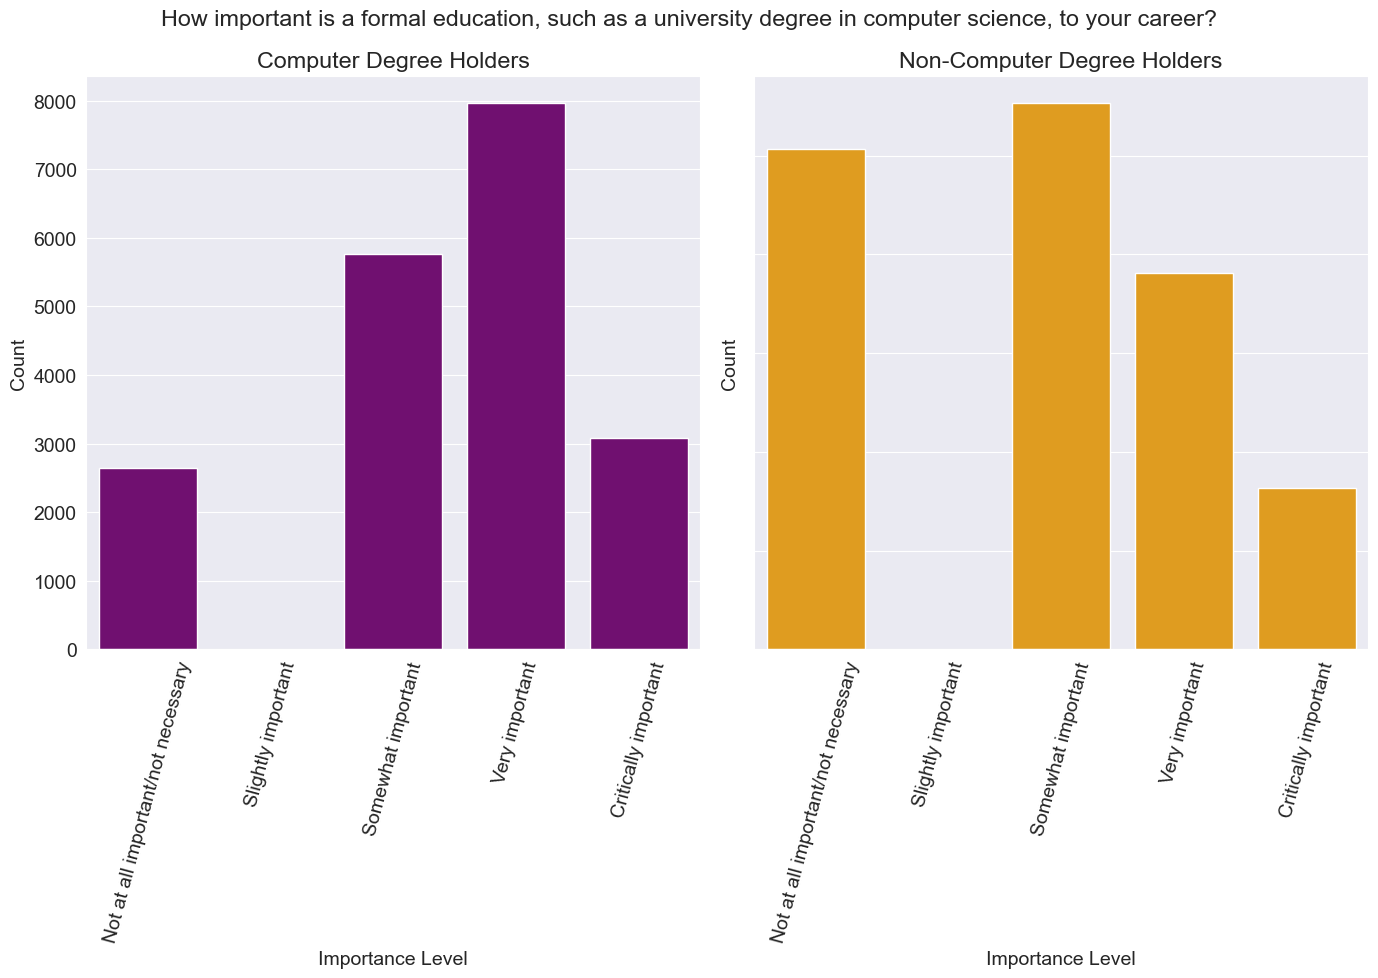

In [242]:
# Create separate subplots for computer degree holders and non-computer degree holders
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))

# Plot for Computer Degree Holders
sns.countplot(x='NEWEdImpt', data=computer_degree_df, order=['Not at all important/not necessary', 'Slightly important', 'Somewhat important', 'Very important', 'Critically important'], color='purple', ax=axes[0])
axes[0].set_title('Computer Degree Holders')
axes[0].set_xlabel('Importance Level')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=75)

# Plot for Non-Computer Degree Holders
sns.countplot(x='NEWEdImpt', data=no_computer_degree_df, order=['Not at all important/not necessary', 'Slightly important', 'Somewhat important', 'Very important', 'Critically important'], color='orange', ax=axes[1])
axes[1].set_title('Non-Computer Degree Holders')
axes[1].set_xlabel('Importance Level')
axes[1].set_ylabel('Count')
axes[1].set_yticklabels([])  # Hide y-axis labels
axes[1].tick_params(axis='x', rotation=75)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.8)

# Overall title and layout adjustments
plt.suptitle(schema.NEWEdImpt)
plt.tight_layout()
plt.show()

In [48]:
survey_df.Employment.value_counts(normalize=True)

Employment
Employed full-time                                      0.709184
Student                                                 0.121999
Independent contractor, freelancer, or self-employed    0.088636
Not employed, but looking for work                      0.036660
Employed part-time                                      0.034704
Not employed, and not looking for work                  0.005016
Retired                                                 0.003802
Name: proportion, dtype: float64

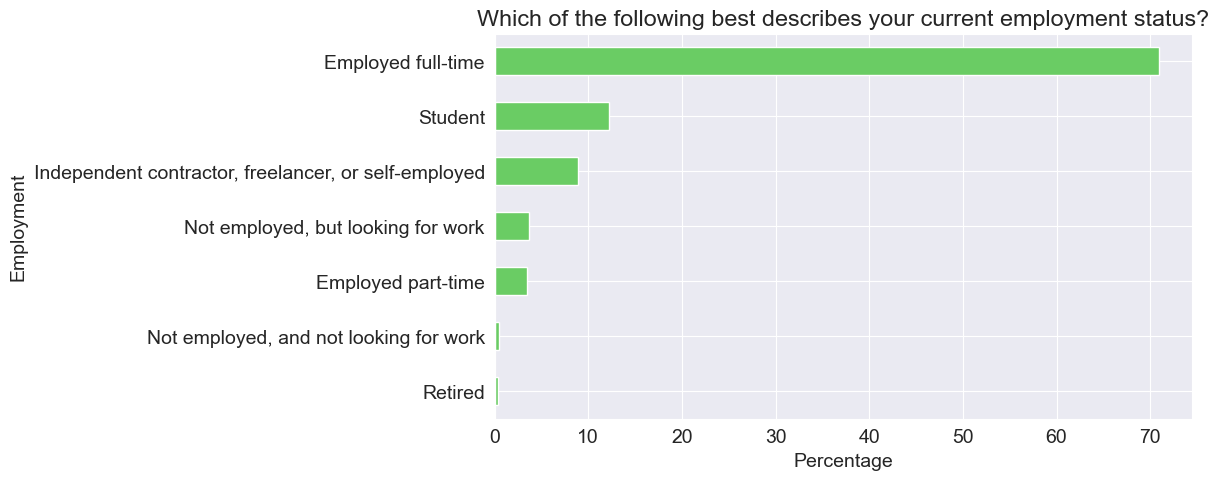

In [49]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

Text(0.5, 0, 'Percentage')

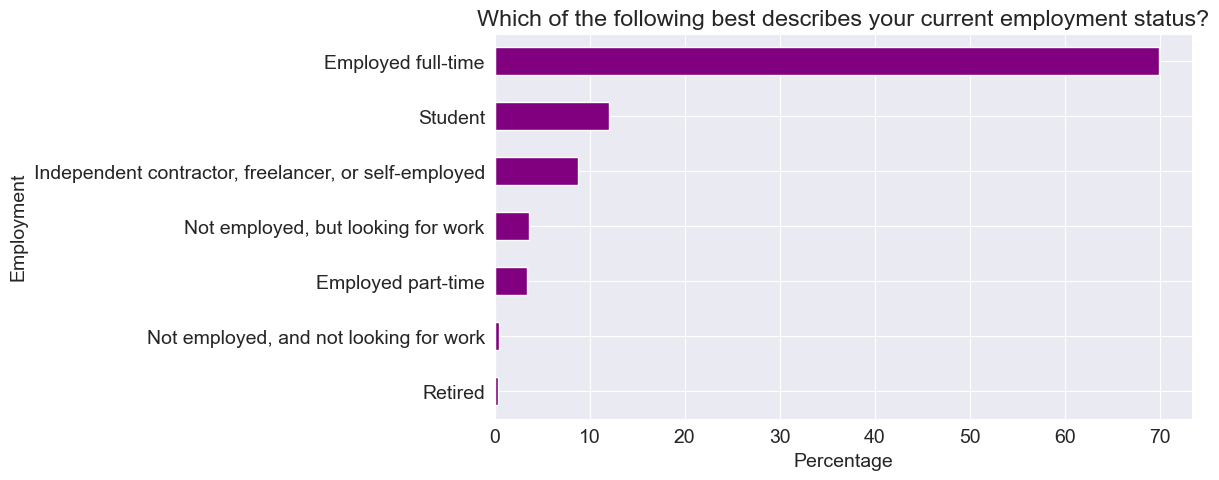

In [244]:
# Calculate counts
employment_counts = survey_df['Employment'].value_counts()

# Calculate total count
total_responses = len(survey_df['Employment'])

# Calculate percentages
employment_percentages = (employment_counts / total_responses) * 100

# Plot the horizontal bar chart
employment_percentages.sort_values().plot(kind='barh', color='purple')

# Add title and labels
plt.title(schema.Employment)
plt.xlabel('Percentage')

In [51]:
"""
employment_types = [
    'Enthusiast' if employment == 'Student' or employment == 'Not employed, but looking for work' else
    'Professional' if employment in ['Employed full-time', 'Employed part-time', 'Freelance', 'Contractor'] else 'Other' 
    for employment in survey_df['Employment']
]

survey_df['EmploymentType'] = employment_types

print(survey_df[['Employment', 'EmploymentType']])
"""

def categorize_employment(employment):
    if employment in ['Student', 'Not employed, but looking for work']:
        return 'Enthusiast'
    elif employment in ['Employed full-time', 'Employed part-time', 'Freelance', 'Contractor']:
        return 'Professional'
    else:
        return 'Other'

survey_df['EmploymentType'] = survey_df['Employment'].apply(categorize_employment)

In [122]:
survey_df.EmploymentType.value_counts()

EmploymentType
Professional    47158
Enthusiast      10058
Other            7090
Name: count, dtype: int64

In [52]:
survey_df.DevType

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 64306, dtype: object

In [61]:
"""The iteritems() method is used to iterate over the items of a pandas Series. 
It returns an iterator that yields pairs of index and value for each element in the Series. 
This is often used in loops to iterate over the elements of a Series.

The to_frame() method is used to convert a pandas Series into a DataFrame. 
It creates a new DataFrame with the Series values as a single column and the Series index as the DataFrame index.
"""
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []

    # Iterate over the column
    for idx, value in col_series.dropna().iteritems():
        # Check if the value is a string
        if isinstance(value, str):
            # Break each value into a list of options
            for option in value.split(';'):
                # Add the option as a column to the result DataFrame
                if option not in result_df.columns:
                    options.append(option)
                    result_df[option] = False
                # Mark the value in the option column as True
                result_df.at[idx, option] = True

    return result_df[options]

In [67]:
"""
- survey_df['DevType'].dropna().str.split(';'): 
This part takes the non-null values in the 'DevType' column, splits each value by ';', and creates a list of lists.
- option for sublist in ... for option in sublist: 
This is a nested list comprehension that iterates over each sublist in the list of lists and extracts each individual option.
- set(...): Converts the extracted options into a set to get unique values.
- col_series.dropna(): Removes NaN values from the 'DevType' column.
- apply(lambda x: pd.Series([...])): Applies a lambda function to each non-null value in the 'DevType' column. 
The lambda function creates a pandas Series with True/False values based on whether each option is present in the value.
- [True if option in x else False for option in options]: 
List comprehension that generates a list of True/False values for each option based on its presence in the value.
- result_df.columns = options. Sets the column names of the resulting DataFrame to the unique options extracted earlier.
"""
def split_multicolumn(col_series):
    result_df = col_series.dropna().apply(lambda x: pd.Series([True if option in x else False for option in options]))
    result_df.columns = options
    return result_df

# Extract unique options from the entire DevType column
options = set(option for sublist in survey_df['DevType'].dropna().str.split(';') for option in sublist)
options

{'Academic researcher',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer, QA or test',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, game or graphics',
 'Developer, mobile',
 'Educator',
 'Engineer, data',
 'Engineer, site reliability',
 'Engineering manager',
 'Marketing or sales professional',
 'Product manager',
 'Scientist',
 'Senior executive/VP',
 'System administrator'}

In [245]:
dev_type_df = split_multicolumn(survey_df['DevType'])
dev_type_df.sample(5)

,"Developer, full-stack","Developer, QA or test",Marketing or sales professional,"Developer, game or graphics",System administrator,DevOps specialist,"Developer, desktop or enterprise applications","Developer, back-end","Developer, front-end","Developer, embedded applications or devices",...,Scientist,Educator,"Engineer, site reliability",Data scientist or machine learning specialist,Engineering manager,"Developer, mobile","Engineer, data",Data or business analyst,Database administrator,Designer
17994,True,False,False,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False
22584,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
28822,True,False,False,True,True,False,True,True,True,False,...,False,False,False,False,False,True,False,False,True,False
23473,True,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
60962,True,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

In [79]:
# % of workers working in roles related to data science
data_related_keywords = ['Data', 'Machine', 'Database', 'Analyst', 'Science', 'Learning']

data_related_counts = dev_type_totals[dev_type_totals.index.str.contains('|'.join(data_related_keywords))]

# Sum the counts for data-related roles
total_data_related_count = data_related_counts.sum()

total_roles_count = dev_type_totals.sum()

# Calculate the percentage
percentage_data_related = (total_data_related_count / total_roles_count) * 100

print(f"The percentage of workers in roles related to data or machine is: {percentage_data_related:.2f}%")

The percentage of workers in roles related to data or machine is: 8.72%


In [94]:
merged_df = pd.concat([dev_type_df, survey_df['Gender']], axis=1)
merged_df.sample(2)

,"Developer, full-stack","Developer, QA or test",Marketing or sales professional,"Developer, game or graphics",System administrator,DevOps specialist,"Developer, desktop or enterprise applications","Developer, back-end","Developer, front-end","Developer, embedded applications or devices",...,Educator,"Engineer, site reliability",Data scientist or machine learning specialist,Engineering manager,"Developer, mobile","Engineer, data",Data or business analyst,Database administrator,Designer,Gender
20928,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,False,Man
51278,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,Man


In [109]:
dev_type_female = merged_df[merged_df["Gender"] == "Woman"]
dev_type_female_pct = (dev_type_female.shape[0] / merged_df.shape[0]) * 100
print(f"Percentage of Women: {pct:.2f}%")

Percentage of Women: 5.96%


In [112]:
# Melt the DataFrame to have 'DevType' and 'Gender' as separate columns
melted_df = pd.melt(merged_df, id_vars='Gender', value_vars=dev_type_df.columns)

# Filter only rows where the value is True
true_rows = melted_df[melted_df['value'] == True]

# Calculate the percentage of women for each job role
percentage_women_by_job = (
    true_rows.groupby('variable')['Gender']
    .apply(lambda x: (x == 'Woman').sum() / len(x) * 100)
    .sort_values(ascending=False)
)

print(percentage_women_by_job)

variable
Marketing or sales professional                  10.240000
Data scientist or machine learning specialist     7.768469
Data or business analyst                          7.103275
Developer, front-end                              6.597529
Developer, QA or test                             6.447470
Designer                                          6.328392
Educator                                          6.148532
Academic researcher                               6.082239
Scientist                                         5.825243
Developer, full-stack                             5.483931
Engineer, data                                    5.027027
Developer, back-end                               4.922952
Developer, mobile                                 4.869232
Product manager                                   4.573047
Database administrator                            3.923648
Developer, game or graphics                       3.816794
Developer, desktop or enterprise applications  

In [113]:
melted_df.sample(2)

,Gender,variable,value
70384,Man,"Developer, QA or test",False
895901,Man,Scientist,NaN


In [117]:
# Melt the DataFrame to have 'DevType' and 'Gender' as separate columns
melted2_df = pd.melt(merged_df, id_vars='Gender', value_vars=dev_type_df.columns)

# Filter only rows where the value is True
true_rows = melted2_df[melted_df['value'] == True]

# Calculate the percentage of women and men for each job role
percentage_by_job = (
    true_rows.groupby(['variable', 'Gender'])
    .size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum() * 100, axis=1)
    .sort_values(by='Woman', ascending=False)
    .reset_index()
    .rename(columns={'variable': 'DevType', 'Man': '%Man', 'Woman': '%Woman'})
)

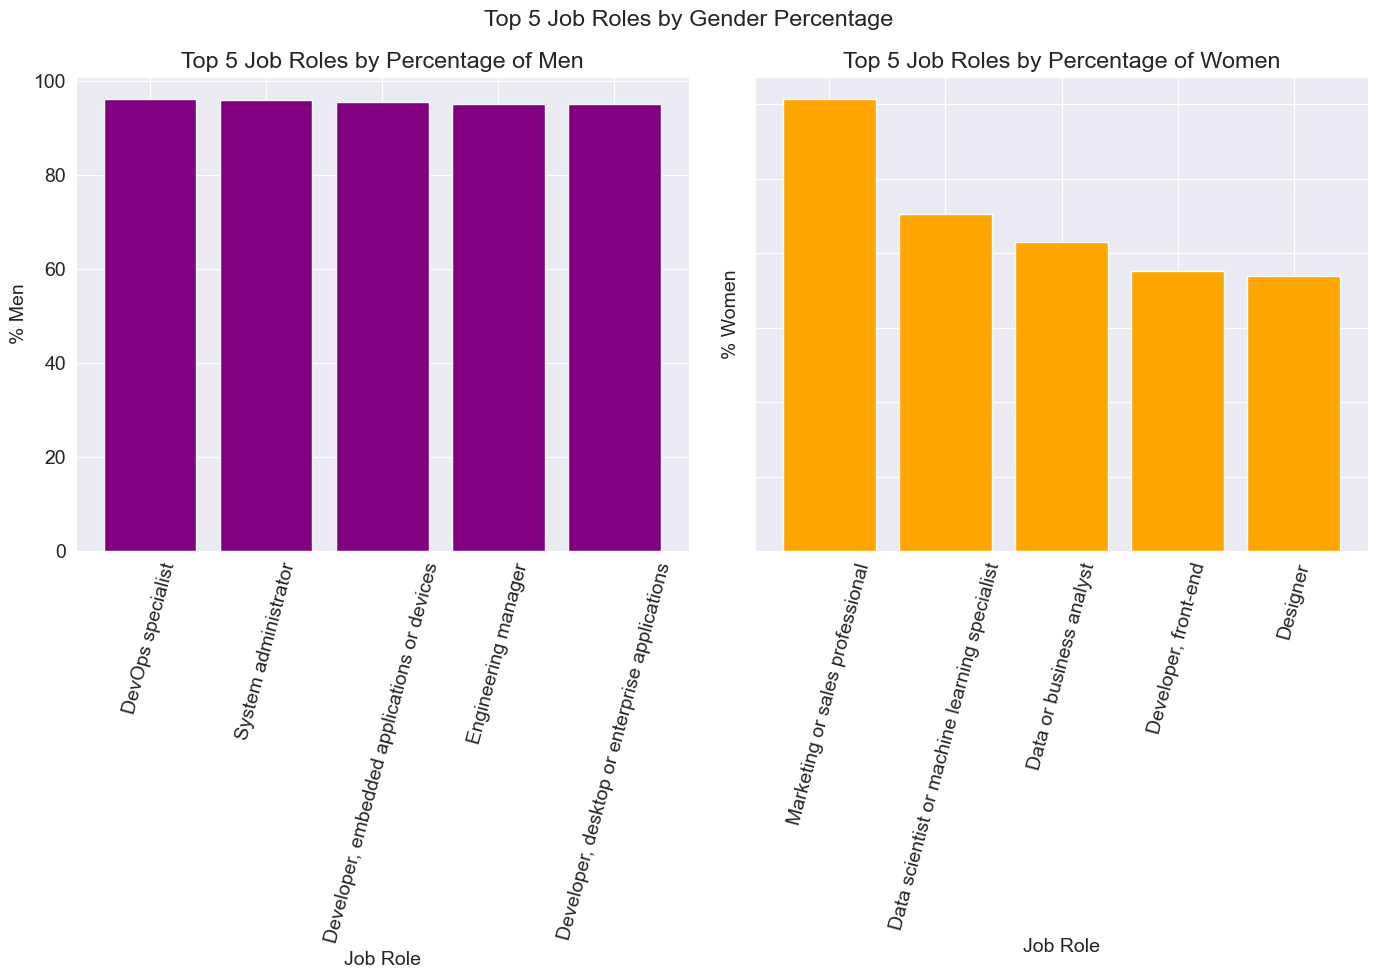

In [120]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))

# Plot for Men
top5_man = percentage_by_job.sort_values(by='%Man', ascending=False).head(5)
axes[0].bar(top5_man['DevType'], top5_man['%Man'], color='purple')
axes[0].set_xlabel('Job Role')
axes[0].set_ylabel('% Men')
axes[0].set_title('Top 5 Job Roles by Percentage of Men')
axes[0].tick_params(axis='x', rotation=75)

# Plot for Women
top5_woman = percentage_by_job.sort_values(by='%Woman', ascending=False).head(5)
axes[1].bar(top5_woman['DevType'], top5_woman['%Woman'], color='orange')
axes[1].set_xlabel('Job Role')
axes[1].set_ylabel('% Women')
axes[1].set_title('Top 5 Job Roles by Percentage of Women')
axes[1].tick_params(axis='x', rotation=75)
axes[1].set_yticklabels([])  # Hide y-axis labels

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.8)

# Overall title and layout adjustments
plt.suptitle('Top 5 Job Roles by Gender Percentage')
plt.tight_layout()
plt.show()

In [121]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [134]:
def split_multicolumn(col_series):
    result_df = col_series.dropna().apply(lambda x: pd.Series([True if option in x else False for option in options]))
    result_df.columns = options
    return result_df
# Extract unique options from the entire DevType column
options = set(option for sublist in survey_df['LanguageWorkedWith'].dropna().str.split(';') for option in sublist)

Lang_df = split_multicolumn(survey_df['LanguageWorkedWith'])
Lang_df.sample(2)

,Haskell,Scala,C#,Python,C,JavaScript,Ruby,Julia,Perl,Go,...,PHP,Bash/Shell/PowerShell,VBA,SQL,Kotlin,Assembly,Rust,Swift,Objective-C,TypeScript
1826,False,False,True,False,True,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
12014,False,False,False,True,True,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False


In [147]:
# to look for the percentage average mean of each language
Lang_df_percent = Lang_df.mean().sort_values(ascending=False) * 100
Lang_df_percent
len(Lang_df_percent)

25

In [152]:
Langs_df_percent = Lang_df.sum().sort_values(ascending=False)
Langs_df_percent

C                        46389
Java                     45396
JavaScript               38515
HTML/CSS                 35884
SQL                      31153
Python                   25080
Bash/Shell/PowerShell    18803
C#                       17879
PHP                      14874
TypeScript               14444
C++                      13578
R                         9207
Go                        4989
Kotlin                    4429
Ruby                      4006
Assembly                  3503
VBA                       3469
Swift                     3361
Rust                      2893
Objective-C               2317
Dart                      2262
Scala                     2026
Perl                      1773
Haskell                   1197
Julia                      503
dtype: int64

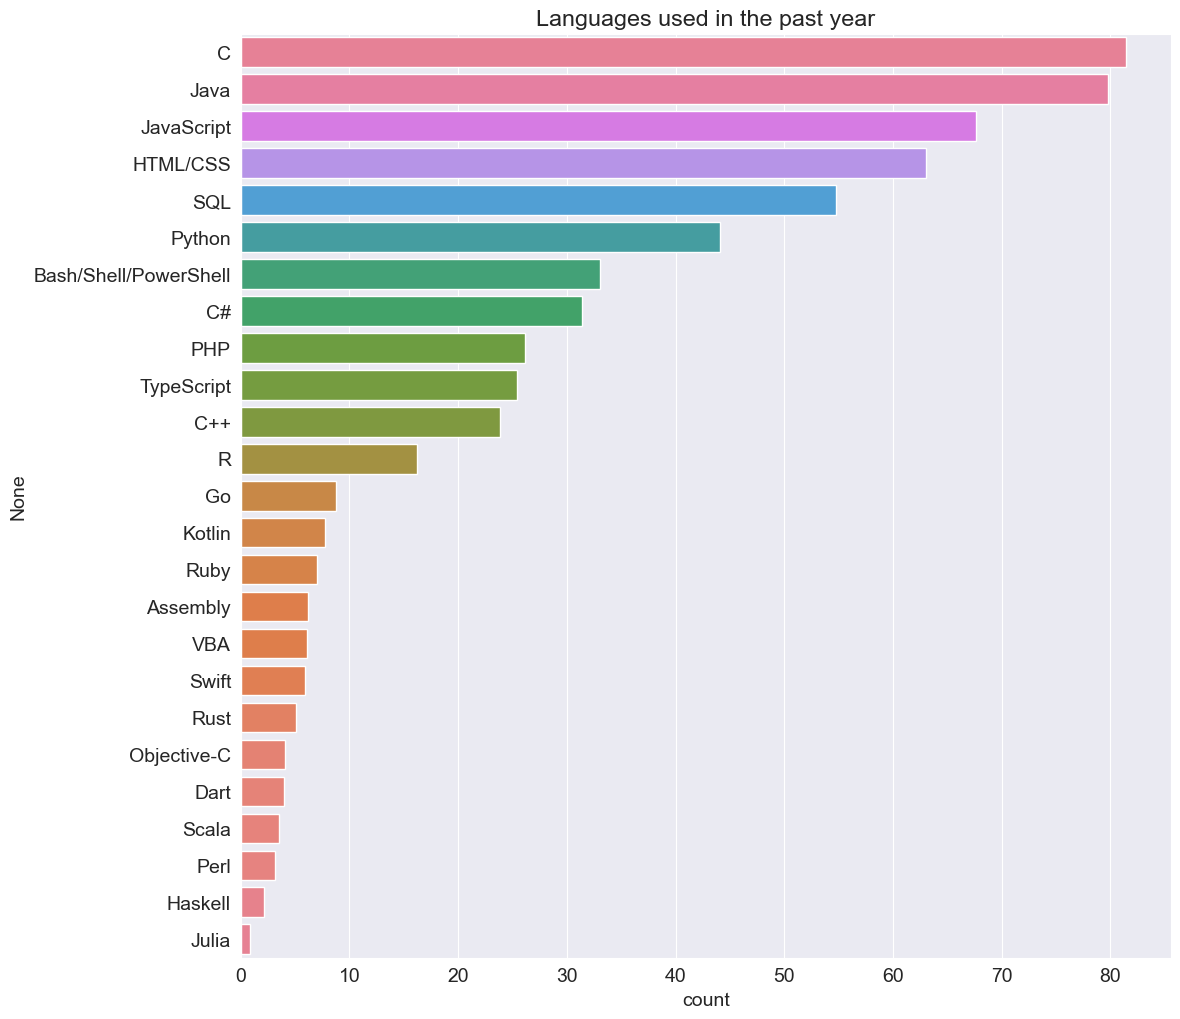

In [137]:
plt.figure(figsize=(12,12))
sns.barplot(x=Lang_df_percent, y=Lang_df_percent.index, hue=Lang_df_percent, palette='husl', legend=False)
plt.title("Languages used in the past year")
plt.xlabel('count');

In [139]:
survey_df.Employment.value_counts()

Employment
Employed full-time                                      44958
Student                                                  7734
Independent contractor, freelancer, or self-employed     5619
Not employed, but looking for work                       2324
Employed part-time                                       2200
Not employed, and not looking for work                    318
Retired                                                   241
Name: count, dtype: int64

In [156]:
survey_df.EmploymentType.value_counts()

EmploymentType
Professional    47158
Enthusiast      10058
Other            7090
Name: count, dtype: int64

In [153]:
"""
What are the most common languages used by students? 
How does the list compare with the most common languages used by professional developers?
"""
#student_df = survey_df[survey_df['Employment'].str.contains('Student', case=False, na=False)]
students_df = survey_df[survey_df['Employment'] == 'Student']
options = set(option for sublist in students_df['LanguageWorkedWith'].dropna().str.split(';') for option in sublist)
Lang2_df = split_multicolumn(students_df['LanguageWorkedWith'])
Lang2_df_percent = Lang2_df.sum().sort_values(ascending=False)
Lang2_df_percent.head(3)

C           6233
Java        5395
HTML/CSS    4621
dtype: int64

In [159]:
proff_df = survey_df[survey_df['EmploymentType'] == 'Professional']
options = set(option for sublist in proff_df['LanguageWorkedWith'].dropna().str.split(';') for option in sublist)
Lang3_df = split_multicolumn(proff_df['LanguageWorkedWith'])
Lang3_df_percent = Lang3_df.sum().sort_values(ascending=False)
Lang3_df_percent.head(3)

Java          33730
C             33622
JavaScript    28950
dtype: int64

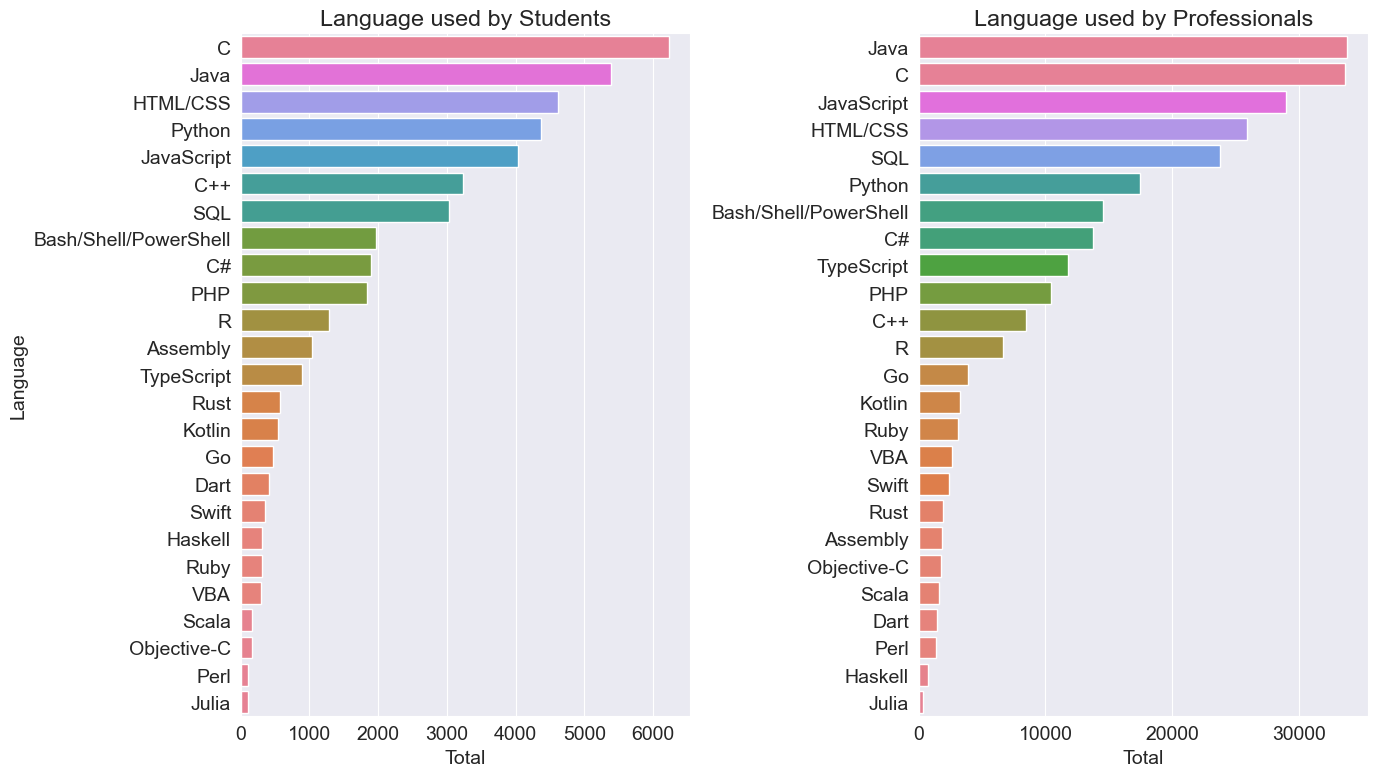

In [165]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Plot for Students
sns.barplot(x=Lang2_df_percent, y=Lang2_df_percent.index, hue=Lang2_df_percent, palette='husl', legend=False, ax=axes[0])
axes[0].set_title('Language used by Students')
axes[0].set_xlabel('Total')
axes[0].set_ylabel('Language')

# Plot for Professionals
sns.barplot(x=Lang3_df_percent, y=Lang3_df_percent.index, hue=Lang3_df_percent, palette='husl', legend=False, ax=axes[1])
axes[1].set_title('Language used by Professionals')
axes[1].set_xlabel('Total')
axes[1].set_ylabel('')
#axes[1].set_ylabel('Language')
#axes[1].set_ylabel(None)
#axes[1].set_yticklabels([])

plt.subplots_adjust(wspace=0.8)
#plt.suptitle(schema.)
plt.tight_layout()
plt.show();

In [167]:
#What are the most common languages among respondents who work in fields related to data science?
data_related_counts

Database administrator                           5658
Data or business analyst                         3970
Data scientist or machine learning specialist    3939
dtype: int64

In [176]:
data_related_keywords = ['Data', 'Machine', 'Database', 'Analyst', 'Science', 'Learning']

data_related_df = survey_df[survey_df.DevType.str.contains('|'.join(data_related_keywords), case=False, na=False)]
# Extract unique options from the entire DevType column
options = set(option for sublist in data_related_df['LanguageWorkedWith'].dropna().str.split(';') for option in sublist)

Lang_data_df = split_multicolumn(data_related_df['LanguageWorkedWith'])
Lang_data_sum = Lang_data_df.sum().sort_values(ascending=False)
Lang_data_sum.head(5)

C             8876
Java          8477
SQL           8299
JavaScript    7358
HTML/CSS      7157
dtype: int64

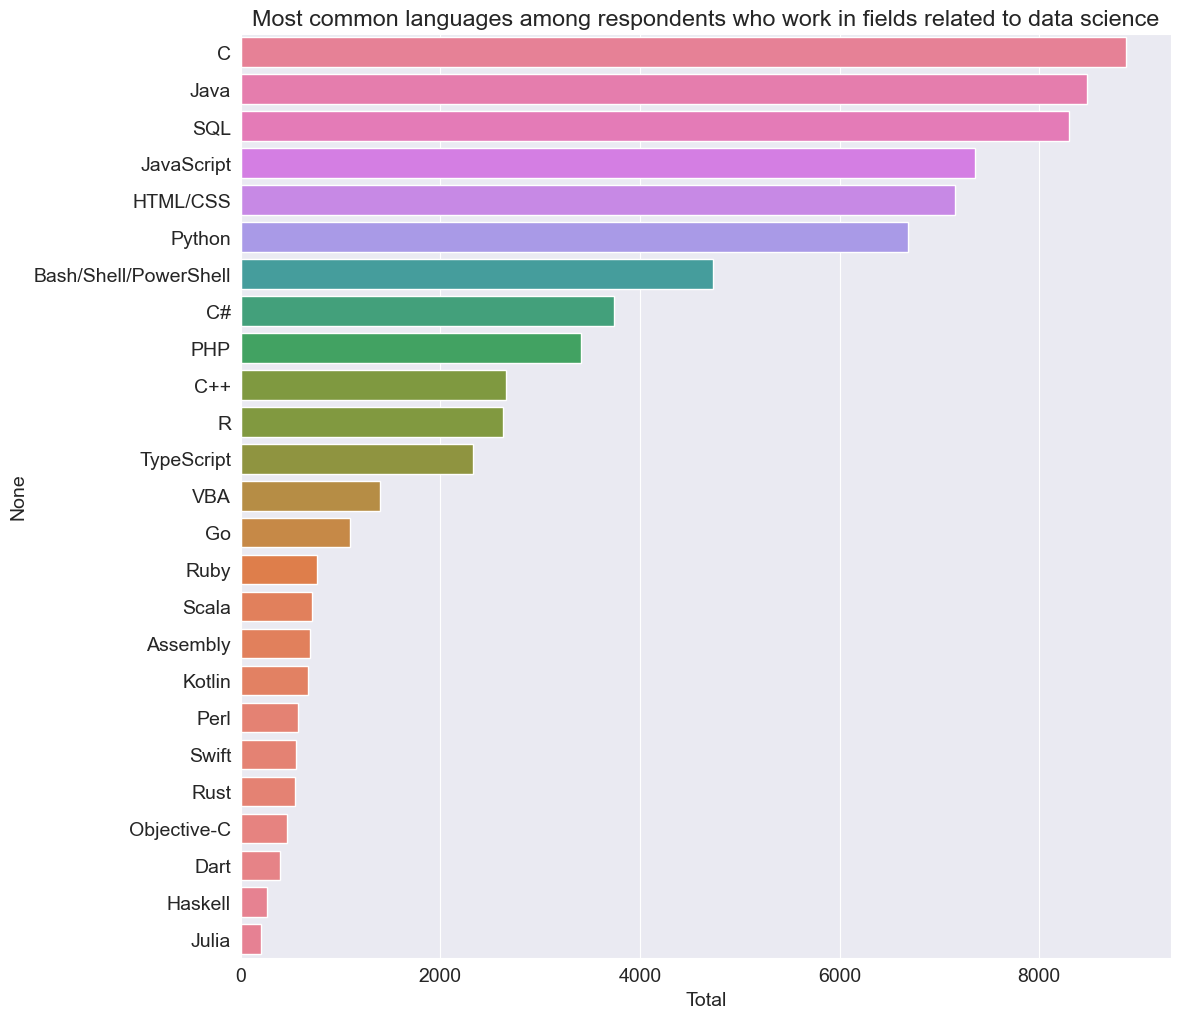

In [177]:
plt.figure(figsize=(12,12))
sns.barplot(x=Lang_data_sum, y=Lang_data_sum.index, hue=Lang_data_sum, palette='husl', legend=False)
plt.title("Most common languages among respondents who work in fields related to data science")
plt.xlabel('Total');

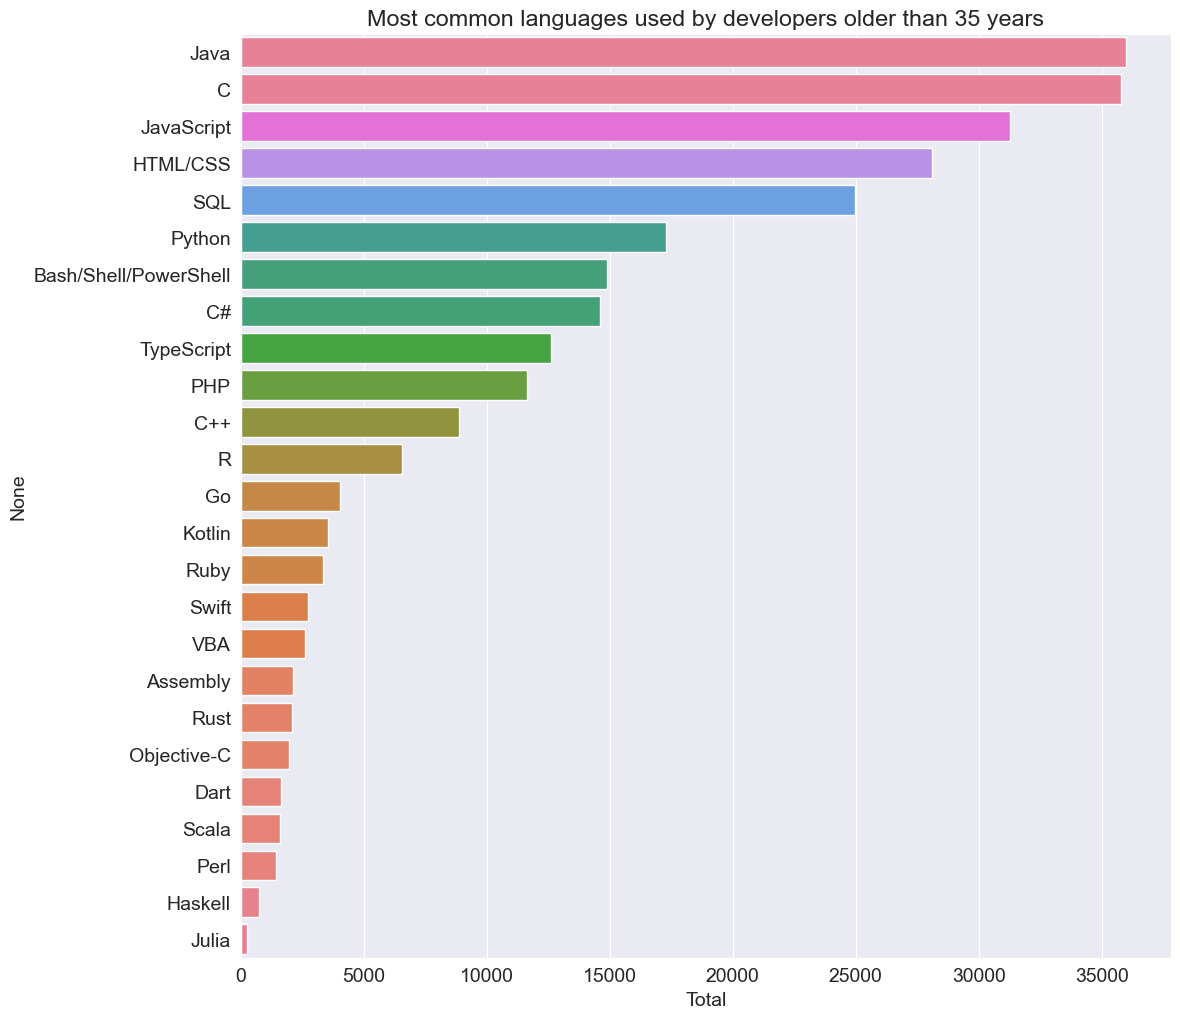

In [181]:
#What are the most common languages used by developers older than 35 years of age?
age_related_df = survey_df[(survey_df['Age'] > 35) | survey_df['DevType'].str.contains('Developer', case=False, na=False)]

# Extract unique Language options from the entire DevType column
options = set(option for sublist in age_related_df['LanguageWorkedWith'].dropna().str.split(';') for option in sublist)
age_lang_df = split_multicolumn(age_related_df['LanguageWorkedWith'])
Lang_age_sum = age_lang_df.sum().sort_values(ascending=False)

plt.figure(figsize=(12,12))
sns.barplot(x=Lang_age_sum, y=Lang_age_sum.index, hue=Lang_age_sum, palette='husl', legend=False)
plt.title("Most common languages used by developers older than 35 years")
plt.xlabel('Total');

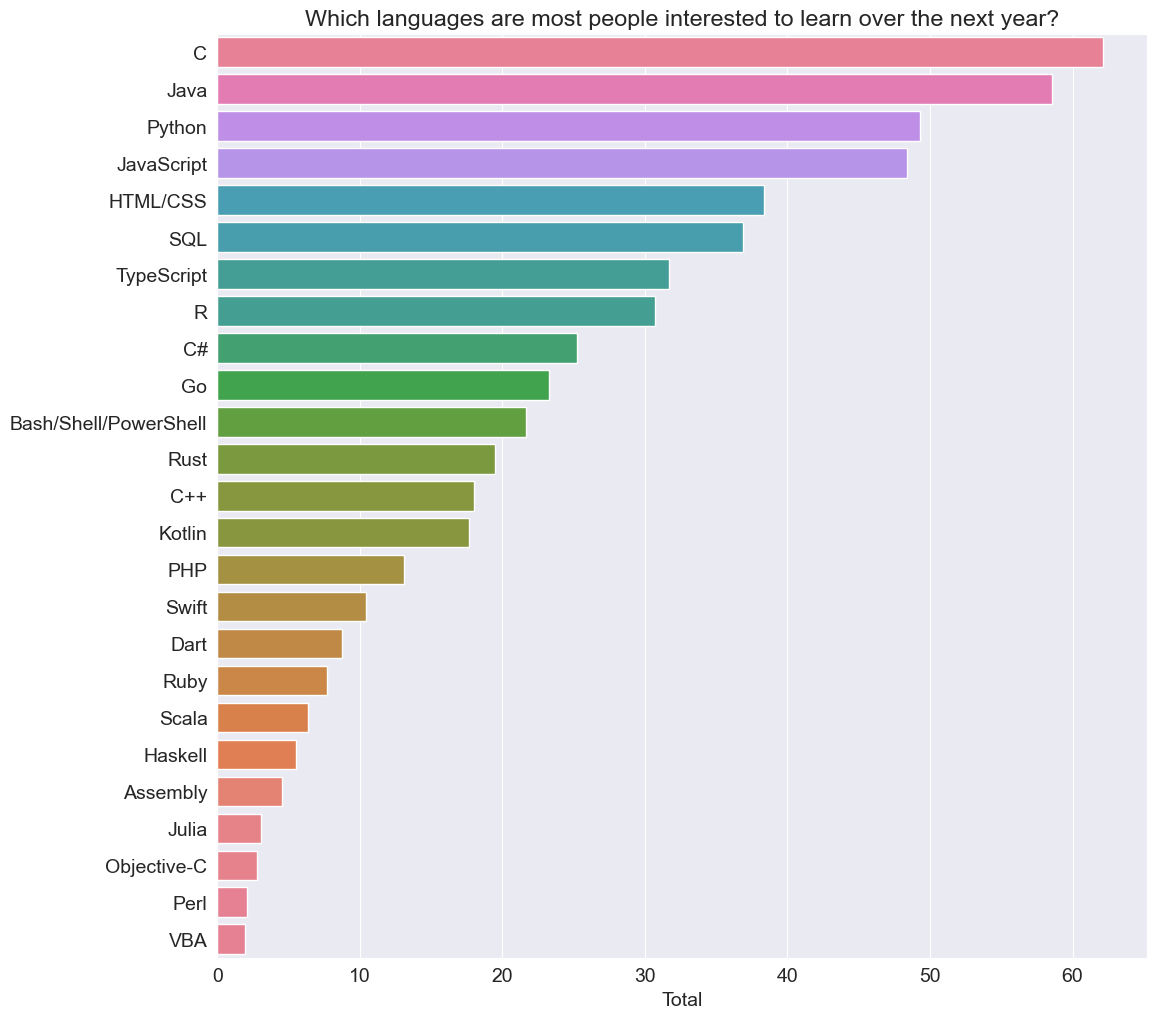

In [189]:
#Which languages are the most people interested to learn over the next year?
options = set(option for sublist in survey_df['LanguageDesireNextYear'].dropna().str.split(';') for option in sublist)
Lang_desired = split_multicolumn(survey_df.LanguageDesireNextYear)
Lang_desired_sum = Lang_desired.mean().sort_values(ascending=False) * 100

plt.figure(figsize=(12,12))
sns.barplot(x=Lang_desired_sum, y=Lang_desired_sum.index, hue=Lang_desired_sum, palette='husl', legend=False)
plt.title('Which languages are most people interested to learn over the next year?')
plt.xlabel('Total')
plt.ylabel('');

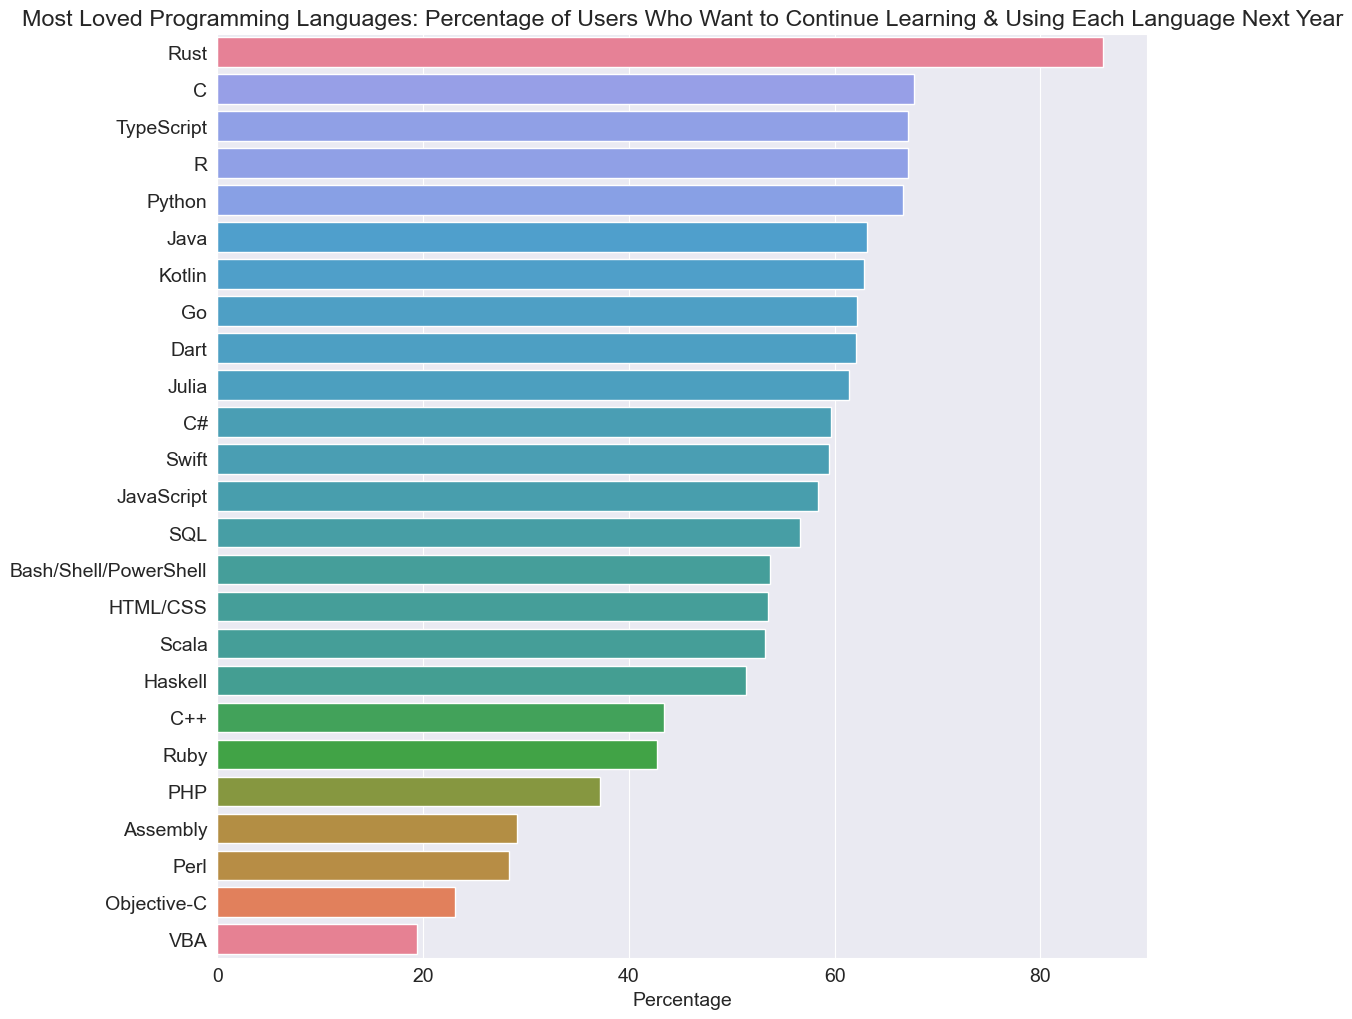

In [197]:
# Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?
# Split the 'LanguageWorkedWith' and 'LanguageDesireNextYear' columns
options = set(option for sublist in survey_df['LanguageWorkedWith'].dropna().str.split(';') for option in sublist)
worked_with_df = split_multicolumn(survey_df['LanguageWorkedWith'])

options = set(option for sublist in survey_df['LanguageDesireNextYear'].dropna().str.split(';') for option in sublist)
desire_next_year_df = split_multicolumn(survey_df['LanguageDesireNextYear'])

# Identify the languages that respondents have worked with
worked_languages = worked_with_df.columns

# Identify the languages that respondents want to continue learning and using next year
desired_languages = desire_next_year_df.columns

# Calculate the percentage of overlap for each language
overlap_percentages = (worked_with_df & desire_next_year_df).sum() / worked_with_df.sum() * 100

# Sort the languages by the overlap percentage in descending order
most_loved_languages = overlap_percentages.sort_values(ascending=False)

# Plot the chart for most_loved_languages
plt.figure(figsize=(12,12))
sns.barplot(x=most_loved_languages, y=most_loved_languages.index, hue=most_loved_languages, palette='husl', legend=False)
plt.title('Most Loved Programming Languages: Percentage of Users Who Want to Continue Learning & Using Each Language Next Year')
plt.xlabel('Percentage')
plt.ylabel('');

In [206]:
# In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.
# 1. Filter rows with non-null 'Country' values
filtered_df = survey_df[survey_df['Country'].notnull()]

# 2. Group by country and calculate the average hours worked per week
average_hours_per_week = filtered_df.groupby('Country')['WorkWeekHrs'].mean()

# 3. Filter countries with more than 250 responses
countries_with_more_than_250 = average_hours_per_week[filtered_df['Country'].value_counts() > 250]

# 4. Sort the results to find the countries where developers work the highest number of hours per week
highest_hours_per_week = countries_with_more_than_250.sort_values(ascending=False).reset_index()
highest_hours_per_week.index = highest_hours_per_week.index + 1
highest_hours_per_week.head(15)

,Country,WorkWeekHrs
1,Iran,44.337748
2,Israel,43.915094
3,China,42.150000
4,United States,41.802982
5,Greece,41.402724
6,Viet Nam,41.391667
7,South Africa,41.023460
8,Turkey,40.982143
9,Sri Lanka,40.612245
10,New Zealand,40.457551


In [210]:
average_hours_per_week = filtered_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs',ascending=False)
countries_with_more_than_250 = average_hours_per_week[filtered_df['Country'].value_counts() > 250]
countries_with_more_than_250.head(15)

C:\Users\hp\AppData\Local\Temp\ipykernel_12140\1755138601.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  countries_with_more_than_250 = average_hours_per_week[filtered_df['Country'].value_counts() > 250]


,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


In [222]:
#Which role has the highest average number of hours worked per week? Which one has the lowest?
options = set(option for sublist in survey_df['DevType'].dropna().str.split(';') for option in sublist)
dev_type_df = split_multicolumn(survey_df['DevType'])

# Merge with a copy of original DataFrame
survey_df_copy = survey_df.copy()
merged_df = pd.merge(survey_df_copy, dev_type_df, left_index=True, right_index=True)

# Reshape the DataFrame to have 'DevType' as the index
merged_df_melted = merged_df.melt(id_vars=['WorkWeekHrs'], value_vars=dev_type_df.columns, var_name='DevType', value_name='Value')
merged_df_melted

,WorkWeekHrs,DevType,Value
0,50.0,"Developer, full-stack",True
1,NaN,"Developer, full-stack",True
2,NaN,"Developer, full-stack",False
3,NaN,"Developer, full-stack",False
4,39.0,"Developer, full-stack",False
...,...,...,...
1126604,NaN,Designer,False
1126605,NaN,Designer,False
1126606,NaN,Designer,False
1126607,NaN,Designer,False


In [230]:
# Filter out rows where 'Value' is True
filtered_df = merged_df_melted[merged_df_melted['Value']]

# Group by 'DevType' and calculate the average number of hours worked per week
average_hours_by_role = filtered_df.groupby('DevType')[['WorkWeekHrs']].mean()
result_df = average_hours_by_role.sort_values('WorkWeekHrs', ascending=False)
result_df

,WorkWeekHrs
DevType,
Senior executive/VP,46.399390
Engineering manager,43.137710
Marketing or sales professional,43.122249
Product manager,42.969179
"Engineer, site reliability",41.702335
Scientist,41.645805
Data or business analyst,41.348697
DevOps specialist,41.331088
Data scientist or machine learning specialist,41.237117


In [231]:
result_df_filtered = result_df.loc[[result_df.idxmax()['WorkWeekHrs'], result_df.idxmin()['WorkWeekHrs']]]
# result_df_filtered.columns = ['Average_WorkWeekHrs']

# Display the sorted and filtered DataFrame
result_df_filtered

,WorkWeekHrs
DevType,
Senior executive/VP,46.39939
"Developer, front-end",39.81997


In [236]:
#How important is it to start young to build a career in programming?
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

Text(0.5, 1.0, 'Relationship between Age and Years of Professional Coding Experience')

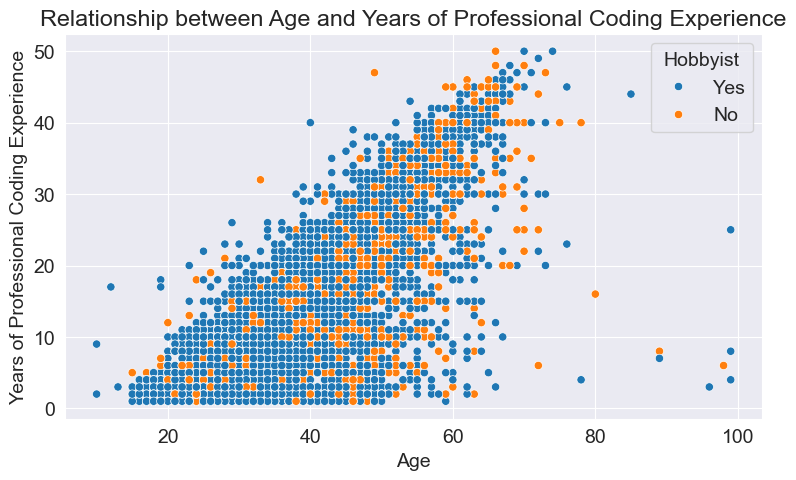

In [254]:
# Create a scatter plot using seaborn
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)

# Set the label for the x-axis
#plt.xlabel('Age')

# Set the label for the y-axis
plt.ylabel('Years of Professional Coding Experience')

# Set the title of the plot
plt.title('Relationship between Age and Years of Professional Coding Experience')

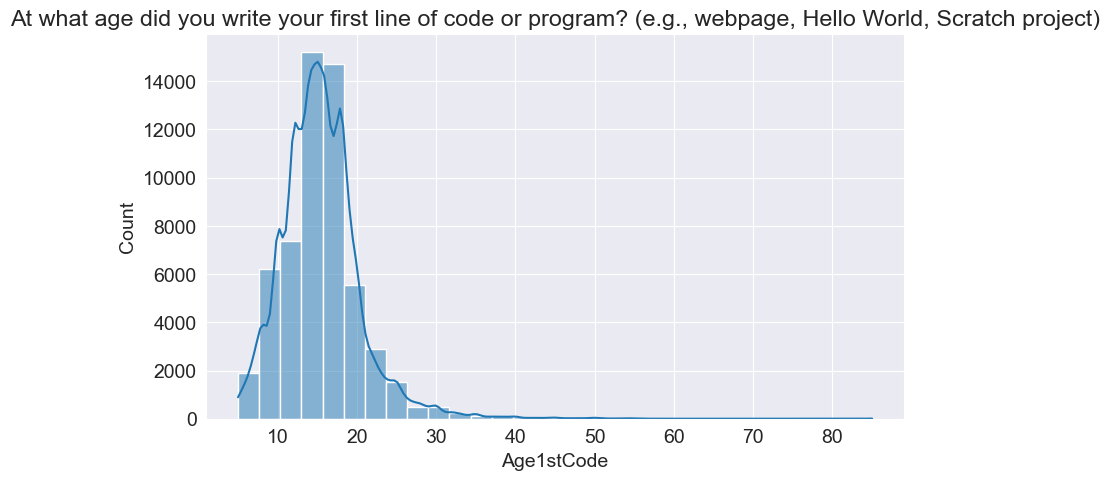

In [247]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True)
plt.ylabel('Count')
plt.xlabel=('Age1stCode')

Inferences and Conclusions
We've drawn many inferences from the survey. Here's a summary of a few of them:

Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.

Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.